In [ ]:
import pandas as pd

In [192]:
df_weather = pd.read_csv('기상데이터전처리_열이름변경.csv')
df_weather.head()

,Unnamed: 0,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역
0,0,19880101,-2.4,-0.8,-4.4,0.5,64.0,서울
1,1,19880101,-2.6,0.5,-6.2,1.9,73.0,관악산
2,2,19880101,-4.1,-0.7,-8.6,0.0,66.0,춘천
3,3,19880101,-3.1,-1.0,-8.6,0.4,79.0,철원
4,4,19880101,3.7,6.5,0.1,0.0,57.0,속초


In [193]:
del df_weather['Unnamed: 0']
df_weather.head()

,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역
0,19880101,-2.4,-0.8,-4.4,0.5,64.0,서울
1,19880101,-2.6,0.5,-6.2,1.9,73.0,관악산
2,19880101,-4.1,-0.7,-8.6,0.0,66.0,춘천
3,19880101,-3.1,-1.0,-8.6,0.4,79.0,철원
4,19880101,3.7,6.5,0.1,0.0,57.0,속초


In [194]:
df_grain = pd.read_csv('작물추천_min_max_추가_데이터타입변경.csv')
df_grain.head()

,Unnamed: 0,temperature,humidity,rainfall,temp_min,temp_max,label
0,0,20.879744,82.002744,202.935536,18,28,rice
1,1,21.770462,80.319644,226.655537,18,28,rice
2,2,23.004459,82.320763,263.964248,18,28,rice
3,3,26.491096,80.158363,242.864034,18,28,rice
4,4,20.130175,81.604873,262.717340,18,28,rice


In [195]:
del df_grain['Unnamed: 0']
df_grain.head()

,temperature,humidity,rainfall,temp_min,temp_max,label
0,20.879744,82.002744,202.935536,18,28,rice
1,21.770462,80.319644,226.655537,18,28,rice
2,23.004459,82.320763,263.964248,18,28,rice
3,26.491096,80.158363,242.864034,18,28,rice
4,20.130175,81.604873,262.717340,18,28,rice


In [ ]:
df_grain['temperature'].min(), df_grain['temperature'].max()

(8.825674745, 43.67549305)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
grain_mmx = scaler.fit_transform(df_grain[df_grain.columns[:-1]])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    grain_mmx, df_grain.label, stratify=df_grain.label, test_size=0.2,
    random_state=2022
)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb.score(X_test, y_test)

0.9931818181818182

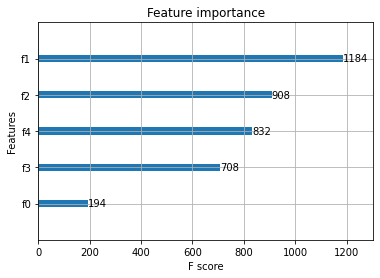

In [ ]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt
xgb_plot_importance(xgb)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [2, 3, 4]
}
grid_xgb = GridSearchCV(
    xgb, params, scoring='accuracy', cv=5
)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 2}

In [ ]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9931818181818182

[1]	valid_0's multi_logloss: 2.06891	valid_0's multi_logloss: 2.06891
[2]	valid_0's multi_logloss: 1.70913	valid_0's multi_logloss: 1.70913
[3]	valid_0's multi_logloss: 1.46114	valid_0's multi_logloss: 1.46114
[4]	valid_0's multi_logloss: 1.27085	valid_0's multi_logloss: 1.27085
[5]	valid_0's multi_logloss: 1.11801	valid_0's multi_logloss: 1.11801
[6]	valid_0's multi_logloss: 0.990981	valid_0's multi_logloss: 0.990981
[7]	valid_0's multi_logloss: 0.882846	valid_0's multi_logloss: 0.882846
[8]	valid_0's multi_logloss: 0.789783	valid_0's multi_logloss: 0.789783
[9]	valid_0's multi_logloss: 0.70819	valid_0's multi_logloss: 0.70819
[10]	valid_0's multi_logloss: 0.635497	valid_0's multi_logloss: 0.635497
[11]	valid_0's multi_logloss: 0.572108	valid_0's multi_logloss: 0.572108
[12]	valid_0's multi_logloss: 0.51513	valid_0's multi_logloss: 0.51513
[13]	valid_0's multi_logloss: 0.465014	valid_0's multi_logloss: 0.465014
[14]	valid_0's multi_logloss: 0.419726	valid_0's multi_logloss: 0.419726
[

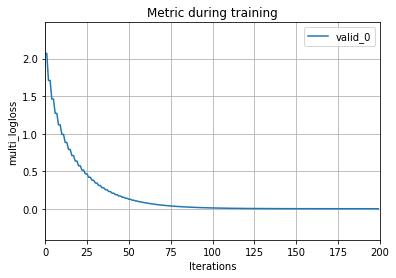

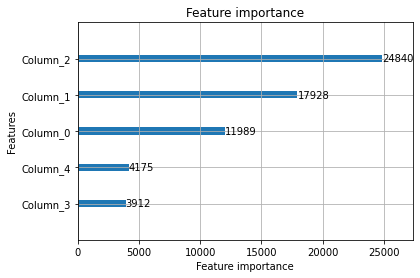

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)
pred_lgb = lgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lgb)
from lightgbm import plot_metric, plot_importance, plot_tree
plot_metric(lgb);
plot_importance(lgb);

In [ ]:
df_grain.columns

Index(['temperature', 'humidity', 'rainfall', 'temp_min', 'temp_max', 'label'], dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2022)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

1.0

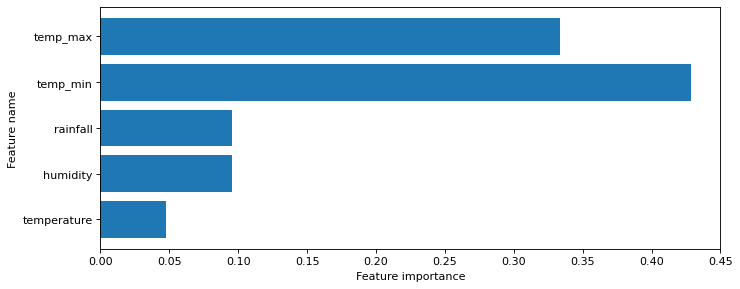

In [ ]:
# min, max 온도 들어갔을때 중요도 / 정확도
import numpy as np
plt.figure(figsize=(10,4), dpi=80)
c_features = len(df_grain.columns[:-1])
plt.barh(range(c_features), dtc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), df_grain.columns)
plt.show()

### 변수 강수량, 온도, 습도 만

In [ ]:
grain_mmx2 = scaler.fit_transform(df_grain[df_grain.columns[:3]])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    grain_mmx2, df_grain.label, stratify= df_grain.label, test_size=0.2,
    random_state=2022
)

0.9113636363636364


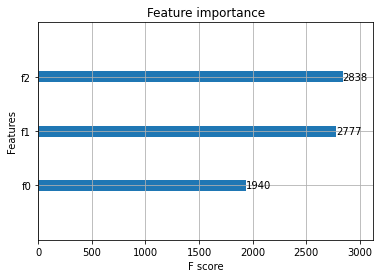

In [ ]:
xgb2 = XGBClassifier()
xgb2.fit(X_train2, y_train2)
print(xgb2.score(X_test2, y_test2))
xgb_plot_importance(xgb2)
plt.show()

[1]	valid_0's multi_logloss: 2.27005	valid_0's multi_logloss: 2.27005
[2]	valid_0's multi_logloss: 1.92655	valid_0's multi_logloss: 1.92655
[3]	valid_0's multi_logloss: 1.68973	valid_0's multi_logloss: 1.68973
[4]	valid_0's multi_logloss: 1.51011	valid_0's multi_logloss: 1.51011
[5]	valid_0's multi_logloss: 1.36186	valid_0's multi_logloss: 1.36186
[6]	valid_0's multi_logloss: 1.23919	valid_0's multi_logloss: 1.23919
[7]	valid_0's multi_logloss: 1.1349	valid_0's multi_logloss: 1.1349
[8]	valid_0's multi_logloss: 1.04394	valid_0's multi_logloss: 1.04394
[9]	valid_0's multi_logloss: 0.965883	valid_0's multi_logloss: 0.965883
[10]	valid_0's multi_logloss: 0.895739	valid_0's multi_logloss: 0.895739
[11]	valid_0's multi_logloss: 0.832927	valid_0's multi_logloss: 0.832927
[12]	valid_0's multi_logloss: 0.778459	valid_0's multi_logloss: 0.778459
[13]	valid_0's multi_logloss: 0.729177	valid_0's multi_logloss: 0.729177
[14]	valid_0's multi_logloss: 0.685095	valid_0's multi_logloss: 0.685095
[15]	

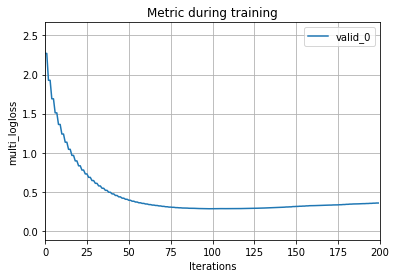

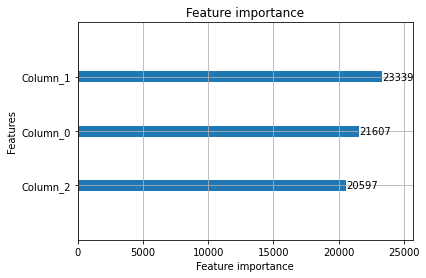

In [ ]:
lgb2 = LGBMClassifier()
lgb2.get_params()
evals = [(X_test2, y_test2)]
lgb2.fit(X_train2, y_train2, eval_set=evals, eval_metric='logloss', verbose=True)
pred_lgb2 = lgb2.predict(X_test2)
print(accuracy_score(y_test2, pred_lgb2))
plot_metric(lgb2);
plot_importance(lgb2);

0.9045454545454545


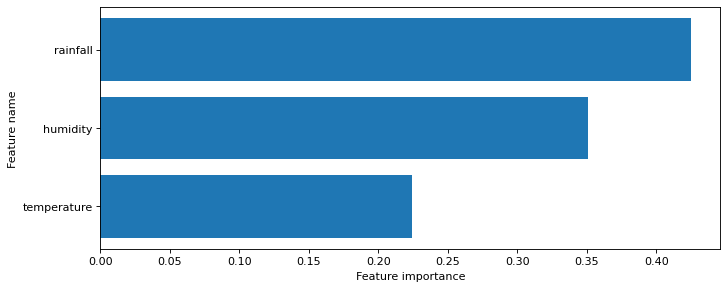

In [ ]:
# 3개 변수일때는 정확도 10% 떨어짐
dtc2 = DecisionTreeClassifier(random_state=2022)
dtc2.fit(X_train2, y_train2)
print(dtc2.score(X_test2, y_test2))
plt.figure(figsize=(10,4), dpi=80)
c_features = len(df_grain.columns[:3])
plt.barh(range(c_features), dtc2.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), df_grain.columns)
plt.show()

In [196]:
df_weather.head()

,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역
0,19880101,-2.4,-0.8,-4.4,0.5,64.0,서울
1,19880101,-2.6,0.5,-6.2,1.9,73.0,관악산
2,19880101,-4.1,-0.7,-8.6,0.0,66.0,춘천
3,19880101,-3.1,-1.0,-8.6,0.4,79.0,철원
4,19880101,3.7,6.5,0.1,0.0,57.0,속초


In [198]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891349 entries, 0 to 891348
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   관측일자         891349 non-null  int64  
 1   temperature  891349 non-null  float64
 2   temp_max     891349 non-null  float64
 3   temp_min     891349 non-null  float64
 4   rainfall     891349 non-null  float64
 5   humidity     891349 non-null  float64
 6   조사지역         891349 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.6+ MB


In [199]:
df_weather['조사지역'].value_counts()

서울     12483
거제     12483
봉화     12483
고흥     12483
여수     12483
       ...  
진도      6376
삼척      5289
무안      4193
고창      3598
관악산     1093
Name: 조사지역, Length: 77, dtype: int64

In [200]:
df_weather['관측일자'] = pd.to_datetime(df_weather['관측일자'], format='%Y%m%d')
df_weather['연'] = df_weather['관측일자'].dt.year
df_weather['월'] = df_weather['관측일자'].dt.month
df_weather['일'] = df_weather['관측일자'].dt.day
df_weather.head()

,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역,연,월,일
0,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,서울,1988,1,1
1,1988-01-01,-2.6,0.5,-6.2,1.9,73.0,관악산,1988,1,1
2,1988-01-01,-4.1,-0.7,-8.6,0.0,66.0,춘천,1988,1,1
3,1988-01-01,-3.1,-1.0,-8.6,0.4,79.0,철원,1988,1,1
4,1988-01-01,3.7,6.5,0.1,0.0,57.0,속초,1988,1,1


In [201]:
df_weather_seoul = df_weather[df_weather['조사지역'] == '서울']
df_weather_region = df_weather_seoul.groupby(['조사지역', '관측일자']).mean()
df_weather_region

temperature  temp_max  temp_min  rainfall  humidity       연  \
조사지역 관측일자                                                                      
서울   1988-01-01         -2.4      -0.8      -4.4       0.5      64.0  1988.0   
     1988-01-02         -1.6       1.6      -4.3       0.0      75.0  1988.0   
     1988-01-03         -2.7       1.3      -6.2       0.0      64.0  1988.0   
     1988-01-04         -0.4       3.2      -3.2       0.0      47.0  1988.0   
     1988-01-05         -2.9       1.9      -6.7       0.0      56.0  1988.0   
...                      ...       ...       ...       ...       ...     ...   
     2022-04-29         13.4      16.5      10.7      15.5      71.0  2022.0   
     2022-04-30         13.0      17.8      10.5       0.0      68.0  2022.0   
     2022-05-01         13.4      19.2       7.9       0.0      55.0  2022.0   
     2022-05-02         14.2      19.4       9.1       0.0      57.0  2022.0   
     2022-05-03         14.8      20.8       9.1       0.0      46.0  2022.0   

                   월     일  
조사지역 관측일자                   
서울   1988-01-01  1.0   1.0  
     1988-01-02  1.0   2.0  
     1988-01-03  1.0   3.0  
     1988-01-04  1.0   4.0  
     1988-01-05  1.0   5.0  
...              ...   ...  
     2022-04-29  4.0  29.0  
     2022-04-30  4.0  30.0  
     2022-05-01  5.0   1.0  
     2022-05-02  5.0   2.0  
     2022-05-03  5.0   3.0  

[12483 rows x 8 columns]

In [202]:
df_weather_region = df_weather_region.reset_index(drop=False)

df_weather_region.head()

,조사지역,관측일자,temperature,temp_max,temp_min,rainfall,humidity,연,월,일
0,서울,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,1988.0,1.0,1.0
1,서울,1988-01-02,-1.6,1.6,-4.3,0.0,75.0,1988.0,1.0,2.0
2,서울,1988-01-03,-2.7,1.3,-6.2,0.0,64.0,1988.0,1.0,3.0
3,서울,1988-01-04,-0.4,3.2,-3.2,0.0,47.0,1988.0,1.0,4.0
4,서울,1988-01-05,-2.9,1.9,-6.7,0.0,56.0,1988.0,1.0,5.0


In [ ]:
import seaborn as sns
sns.pairplot(df_weather_region)

In [204]:
cols = ['temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity']
temp_min = df_weather_region['temperature'].min()
temp_max = df_weather_region['temperature'].max()
tempmx_min = df_weather_region['temp_max'].min()
tempmx_max = df_weather_region['temp_max'].max()
tempmn_min = df_weather_region['temp_min'].min()
tempmn_max = df_weather_region['temp_min'].max()
rf_min = df_weather_region['rainfall'].min()
rf_max = df_weather_region['rainfall'].max()
hm_min = df_weather_region['humidity'].min()
hm_max = df_weather_region['humidity'].max()
print(f'기온최소 : {temp_min}\t기온최대 : {temp_max}')
print(f'최고기온최소 : {tempmx_min}\t최고기온최대 : {tempmx_max}')
print(f'최소기온최소 : {tempmn_min}\t최소기온최대 : {tempmn_max}')
print(f'습도최소 : {rf_min}\t습도최대 : {rf_max}')


기온최소 : -15.5	기온최대 : 33.7
최고기온최소 : -12.5	최고기온최대 : 39.6
최소기온최소 : -18.6	최소기온최대 : 30.3
습도최소 : 0.0	습도최대 : 332.8


,조사지역,관측일자,temperature,temp_max,temp_min,rainfall,humidity,연,월,일
181,서울,1988-06-30,25.1,29.9,21.4,0.0,70.0,1988.0,6.0,30.0
546,서울,1989-06-30,24.1,28.2,20.4,0.2,70.0,1989.0,6.0,30.0
911,서울,1990-06-30,22.0,26.8,18.1,0.0,67.0,1990.0,6.0,30.0
1276,서울,1991-06-30,23.7,29.0,18.0,0.0,79.0,1991.0,6.0,30.0
1642,서울,1992-06-30,22.4,28.2,18.8,0.0,63.0,1992.0,6.0,30.0
2007,서울,1993-06-30,18.1,19.3,16.8,8.0,91.0,1993.0,6.0,30.0
2372,서울,1994-06-30,22.7,23.4,22.2,50.6,97.0,1994.0,6.0,30.0
2737,서울,1995-06-30,22.3,24.6,20.5,4.3,83.0,1995.0,6.0,30.0
3103,서울,1996-06-30,20.4,22.4,18.2,0.4,89.0,1996.0,6.0,30.0
3468,서울,1997-06-30,25.7,31.1,22.5,0.9,76.0,1997.0,6.0,30.0


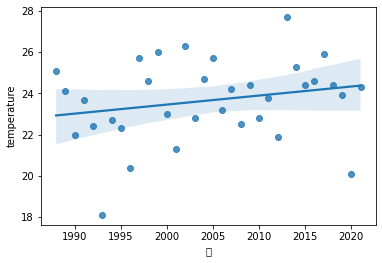

In [205]:
# 특정지역 / 특정월 / 특정일의 시계열과 온도의 상관도
day_list = [23, 24, 25, 26, 27, 28, 29, 30]
df_seoul_june = df_weather_region.loc[(df_weather_region['월'] == 6)&(df_weather_region['일'] == 30)]
display(df_seoul_june)
sns.regplot(x='연', y='temperature', data=df_seoul_june)

In [206]:
# 6월 30일의 역대 min / max
temp_min = df_seoul_june['temperature'].min()
temp_max = df_seoul_june['temperature'].max()
tempmx_min = df_seoul_june['temp_max'].min()
tempmx_max = df_seoul_june['temp_max'].max()
tempmn_min = df_seoul_june['temp_min'].min()
tempmn_max = df_seoul_june['temp_min'].max()
rf_min = df_seoul_june['rainfall'].min()
rf_max = df_seoul_june['rainfall'].max()
hm_min = df_seoul_june['humidity'].min()
hm_max = df_seoul_june['humidity'].max()
print(f'기온최소 : {temp_min}\t기온최대 : {temp_max}')
print(f'최고기온최소 : {tempmx_min}\t최고기온최대 : {tempmx_max}')
print(f'최소기온최소 : {tempmn_min}\t최소기온최대 : {tempmn_max}')
print(f'습도최소 : {rf_min}\t습도최대 : {rf_max}')

기온최소 : 18.1	기온최대 : 27.7
최고기온최소 : 19.3	최고기온최대 : 31.9
최소기온최소 : 16.8	최소기온최대 : 23.4
습도최소 : 0.0	습도최대 : 69.5


In [207]:
# 벡터머신 시계열 데이터로 학습시키면 정확도 음수나옴
from sklearn.svm import SVR
svr = SVR()

X_train3 = df_seoul_june[df_seoul_june['연'] <= 2002][['연', '일']]
y_train3 = df_seoul_june[df_seoul_june['연'] <= 2002]['temperature']
X_test3 = df_seoul_june[df_seoul_june['연'] >= 2002][['연', '일']]
y_test3 = df_seoul_june[df_seoul_june['연'] >= 2002]['temperature']

svr.fit(X_train3, y_train3)
svr.score(X_test3, y_test3)

-0.4887094078230594

In [208]:
# 연과 최대온도간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_seoul_june[['연']], df_seoul_june.temperature)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_seoul_june['연'].values.reshape(-1,1), df_seoul_june.temperature)

0.05019289099544744

In [209]:
# 연과 온도간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_seoul_june[['연']], df_seoul_june.temp_max)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_seoul_june['연'].values.reshape(-1,1), df_seoul_june.temp_max)

0.01831555258122386

In [210]:
df_weather_region

,조사지역,관측일자,temperature,temp_max,temp_min,rainfall,humidity,연,월,일
0,서울,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,1988.0,1.0,1.0
1,서울,1988-01-02,-1.6,1.6,-4.3,0.0,75.0,1988.0,1.0,2.0
2,서울,1988-01-03,-2.7,1.3,-6.2,0.0,64.0,1988.0,1.0,3.0
3,서울,1988-01-04,-0.4,3.2,-3.2,0.0,47.0,1988.0,1.0,4.0
4,서울,1988-01-05,-2.9,1.9,-6.7,0.0,56.0,1988.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
12478,서울,2022-04-29,13.4,16.5,10.7,15.5,71.0,2022.0,4.0,29.0
12479,서울,2022-04-30,13.0,17.8,10.5,0.0,68.0,2022.0,4.0,30.0
12480,서울,2022-05-01,13.4,19.2,7.9,0.0,55.0,2022.0,5.0,1.0
12481,서울,2022-05-02,14.2,19.4,9.1,0.0,57.0,2022.0,5.0,2.0


In [211]:
# 월 기준으로 평균치 groupby
df_month_mean = df_weather_region.groupby(['연', '월']).mean()
df_month_mean.head()

temperature   temp_max   temp_min  rainfall   humidity     일
연      월                                                                
1988.0 1.0    -2.141935   1.887097  -5.741935  0.106452  60.161290  16.0
       2.0    -1.479310   3.213793  -5.265517  0.155172  55.000000  15.0
       3.0     4.319355   8.829032   0.116129  1.009677  51.935484  16.0
       4.0    11.340000  16.570000   6.666667  2.016667  55.833333  15.5
       5.0    17.883871  23.406452  13.012903  1.380645  54.354839  16.0

In [212]:
df_month_mean = df_month_mean.reset_index(drop=False)
df_month_mean.head()

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
0,1988.0,1.0,-2.141935,1.887097,-5.741935,0.106452,60.161290,16.0
1,1988.0,2.0,-1.479310,3.213793,-5.265517,0.155172,55.000000,15.0
2,1988.0,3.0,4.319355,8.829032,0.116129,1.009677,51.935484,16.0
3,1988.0,4.0,11.340000,16.570000,6.666667,2.016667,55.833333,15.5
4,1988.0,5.0,17.883871,23.406452,13.012903,1.380645,54.354839,16.0


In [213]:
df_month_mean

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
0,1988.0,1.0,-2.141935,1.887097,-5.741935,0.106452,60.161290,16.00
1,1988.0,2.0,-1.479310,3.213793,-5.265517,0.155172,55.000000,15.00
2,1988.0,3.0,4.319355,8.829032,0.116129,1.009677,51.935484,16.00
3,1988.0,4.0,11.340000,16.570000,6.666667,2.016667,55.833333,15.50
4,1988.0,5.0,17.883871,23.406452,13.012903,1.380645,54.354839,16.00
...,...,...,...,...,...,...,...,...
408,2022.0,1.0,-2.056667,2.816667,-6.150000,0.183333,55.566667,16.10
409,2022.0,2.0,-1.125000,3.821429,-5.353571,0.167857,54.642857,14.50
410,2022.0,3.0,7.517857,12.600000,3.092857,3.178571,60.428571,16.75
411,2022.0,4.0,14.753333,20.580000,9.980000,0.680000,55.100000,15.50


In [214]:
df_june_mean = df_month_mean[df_month_mean['월'] == 6]
df_june_mean.head()

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
5,1988.0,6.0,22.253333,27.326667,18.216667,2.456667,69.466667,15.5
17,1989.0,6.0,21.200000,26.193333,16.863333,5.903333,67.000000,15.5
29,1990.0,6.0,20.743333,24.580000,17.406667,16.573333,80.966667,15.5
41,1991.0,6.0,22.563333,27.633333,18.333333,2.726667,70.000000,15.5
53,1992.0,6.0,20.850000,25.976667,16.413333,3.320000,66.066667,15.5


In [215]:
df_tmp = df_weather_region.loc[(df_weather_region['연'] == 2000) & (df_weather_region['월'] == 6)]
temp_max = df_tmp['temp_max'].max()
temp_min = df_tmp['temp_min'].max()
print(temp_max, temp_min)

33.9 22.6


In [216]:
for i in df_june_mean.index:
    df_tmp = df_weather_region.loc[(df_weather_region['연'] == df_june_mean.loc[i, '연']) & (df_weather_region['월'] == df_june_mean.loc[i, '월'])]
    temp_max = df_tmp['temp_max'].max()
    temp_min = df_tmp['temp_min'].max()
    df_june_mean.loc[i, 'temp_max'] = temp_max
    df_june_mean.loc[i, 'temp_min'] = temp_min
df_june_mean.head()

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
5,1988.0,6.0,22.253333,32.8,21.9,2.456667,69.466667,15.5
17,1989.0,6.0,21.200000,31.9,21.7,5.903333,67.000000,15.5
29,1990.0,6.0,20.743333,29.4,20.5,16.573333,80.966667,15.5
41,1991.0,6.0,22.563333,31.8,22.3,2.726667,70.000000,15.5
53,1992.0,6.0,20.850000,29.8,19.2,3.320000,66.066667,15.5


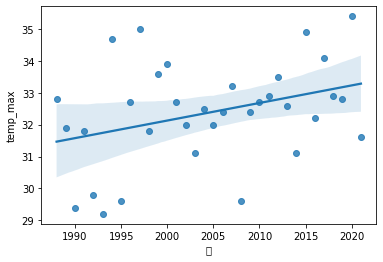

In [217]:
# 월최대온도로 계산
sns.regplot(x='연', y='temp_max', data=df_june_mean)

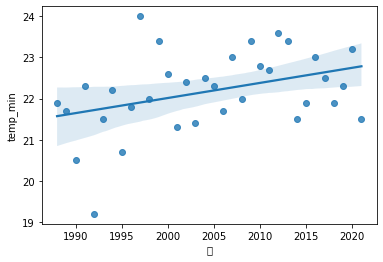

In [218]:
# 월최소온도로 계산
sns.regplot(x='연', y='temp_min', data=df_june_mean)

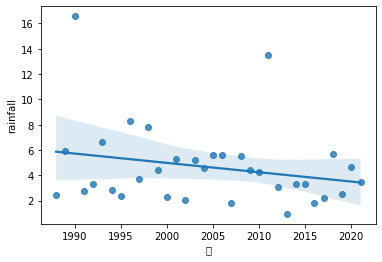

In [219]:
# 월최소온도로 계산
sns.regplot(x='연', y='rainfall', data=df_june_mean)

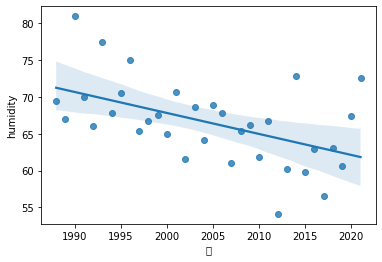

In [220]:
# 월최소온도로 계산
sns.regplot(x='연', y='humidity', data=df_june_mean)

In [221]:
# 연과 강수간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_june_mean[['연']], df_june_mean.rainfall)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.rainfall)

0.0534694999190336

In [222]:
# 연과 습도간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_june_mean[['연']], df_june_mean.humidity)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.humidity)

0.25765127663166365

In [223]:
# 연과 최고기온간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_june_mean[['연']], df_june_mean.temp_max)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.temp_max)

0.11855746323831584

In [224]:
# 연과 최저기온간 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_june_mean[['연']], df_june_mean.temp_min)

lr.coef_
lr.intercept_
lr._residues
lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.temp_min)

0.14263609258131482

In [225]:
def weather_predict(region, month):

    df_weather_seoul = df_weather[df_weather['조사지역'] == '서울']
    df_weather_region = df_weather_seoul.groupby(['조사지역', '관측일자']).mean()
    df_weather_region

    df_month_mean = df_weather_region.groupby(['연', '월']).mean()
    df_month_mean = df_month_mean.reset_index(drop=False)
    df_june_mean = df_month_mean[df_month_mean['월'] == 6]

    for i in df_june_mean.index:
        df_tmp = df_weather_region.loc[(df_weather_region['연'] == df_june_mean.loc[i, '연']) & (df_weather_region['월'] == df_june_mean.loc[i, '월'])]
        temp_max = df_tmp['temp_max'].max()
        temp_min = df_tmp['temp_min'].max()
        df_june_mean.loc[i, 'temp_max'] = temp_max
        df_june_mean.loc[i, 'temp_min'] = temp_min
    df_june_mean.head()

    lr = LinearRegression()
    lr.fit(df_june_mean[['연']], df_june_mean.rainfall)
    lr.coef_
    lr.intercept_
    lr._residues
    score_rainfall = lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.rainfall)

    lr = LinearRegression()
    lr.fit(df_june_mean[['연']], df_june_mean.humidity)
    lr.coef_
    lr.intercept_
    lr._residues
    score_humidity = lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.humidity)


    lr = LinearRegression()
    lr.fit(df_june_mean[['연']], df_june_mean.temp_max)
    lr.coef_
    lr.intercept_
    lr._residues
    score_tempmx = lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.temp_max)


    lr = LinearRegression()
    lr.fit(df_june_mean[['연']], df_june_mean.temp_min)
    lr.coef_
    lr.intercept_
    lr._residues
    score_tmmn = lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.temp_min)

    lr = LinearRegression()
    lr.fit(df_june_mean[['연']], df_june_mean.temperature)
    lr.coef_
    lr.intercept_
    lr._residues
    score_temp = lr.score(df_june_mean['연'].values.reshape(-1,1), df_june_mean.temperature)

    return print(f'연/월최고온도: {score_tempmx}\t연/월최저온도: {score_tmmn}\t연/월평균기온: {score_temp}\n연/월습도: {score_humidity}\t연/월강수량: {score_rainfall}')

In [226]:
import warnings
warnings.filterwarnings('ignore')
weather_predict('속초', 3)

연/월최고온도: 0.11855746323831584	연/월최저온도: 0.14263609258131482	연/월평균기온: 0.3504333657250297
연/월습도: 0.25765127663166365	연/월강수량: 0.0534694999190336


In [227]:
df_weather.head()

,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역,연,월,일
0,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,서울,1988,1,1
1,1988-01-01,-2.6,0.5,-6.2,1.9,73.0,관악산,1988,1,1
2,1988-01-01,-4.1,-0.7,-8.6,0.0,66.0,춘천,1988,1,1
3,1988-01-01,-3.1,-1.0,-8.6,0.4,79.0,철원,1988,1,1
4,1988-01-01,3.7,6.5,0.1,0.0,57.0,속초,1988,1,1


In [228]:
df_weather['조사지역'].unique()

array(['서울', '관악산', '춘천', '철원', '속초', '원주', '대관령', '태백', '삼척', '인제', '홍천',
       '대전', '금산', '부여', '천안', '보령', '서산', '청주', '추풍령', '보은', '제천', '인천',
       '강화', '수원', '이천', '양평', '광주', '장흥', '목포', '해남', '순천', '고흥', '완도',
       '여수', '전주', '임실', '군산', '부안', '정읍', '남원', '장수', '부산', '밀양', '창원',
       '통영', '거제', '진주', '산청', '남해', '거창', '합천', '울산', '제주', '고산', '서귀포',
       '성산포', '대구', '구미', '문경', '영주', '봉화', '안동', '영덕', '울진', '의성', '영천',
       '포항', '울릉도', '동해', '무안', '영월', '흑산도', '동두천', '문산', '진도', '상주',
       '고창'], dtype=object)

In [229]:
weather_predict('포항', 7)

연/월최고온도: 0.11855746323831584	연/월최저온도: 0.14263609258131482	연/월평균기온: 0.3504333657250297
연/월습도: 0.25765127663166365	연/월강수량: 0.0534694999190336


In [231]:
df_june_mean.head()

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
5,1988.0,6.0,22.253333,32.8,21.9,2.456667,69.466667,15.5
17,1989.0,6.0,21.200000,31.9,21.7,5.903333,67.000000,15.5
29,1990.0,6.0,20.743333,29.4,20.5,16.573333,80.966667,15.5
41,1991.0,6.0,22.563333,31.8,22.3,2.726667,70.000000,15.5
53,1992.0,6.0,20.850000,29.8,19.2,3.320000,66.066667,15.5


In [232]:
df_june_mean.columns

Index(['연', '월', 'temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity',
       '일'],
      dtype='object')

In [237]:
df_std = scaler.fit_transform(df_june_mean[['연', 'temperature', 'temp_max', 'temp_min', 'humidity']])
df_target = df_june_mean['rainfall']

In [234]:
len(df_std)

34

In [245]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

X_train = df_std[:-6]
X_test = df_std[-6:]
y_train = df_target[:-6]
y_test  = df_target[-6:]
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.09893144407892163

In [258]:
# OLS 유의성 검정 (연 / 강수량)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['rainfall']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              23.69
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.72e-05
Time:                        07:32:11   Log-Likelihood:                         -97.644
No. Observations:                  34   AIC:                                      197.3
Df Residuals:                      33   BIC:                                      198.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연              6.2282      1.280      4.868      0.000       3.625       8.831
==============================================================================
Omnibus:                       19.481   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.346
Skew:                           1.488   Prob(JB):                     7.00e-07
Kurtosis:                       6.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# OLS 유의성 검정 (연 / 평균기온)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['temperature']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              103.9
Date:                Mon, 09 May 2022   Prob (F-statistic):                    9.98e-12
Time:                        07:32:28   Log-Likelihood:                         -130.10
No. Observations:                  34   AIC:                                      262.2
Df Residuals:                      33   BIC:                                      263.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연             33.8801      3.323     10.194      0.000      27.118      40.642
==============================================================================
Omnibus:                        6.222   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                2.003
Skew:                          -0.027   Prob(JB):                        0.367
Kurtosis:                       1.812   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
# OLS 유의성 검정 (연 / 최대기온)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['temp_max']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              99.95
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.63e-11
Time:                        07:32:52   Log-Likelihood:                         -142.83
No. Observations:                  34   AIC:                                      287.7
Df Residuals:                      33   BIC:                                      289.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연             48.3150      4.833      9.997      0.000      38.483      58.147
==============================================================================
Omnibus:                        6.372   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                2.021
Skew:                           0.000   Prob(JB):                        0.364
Kurtosis:                       1.806   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
# OLS 유의성 검정 (연 / 최소기온)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['temp_min']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              99.93
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.63e-11
Time:                        07:33:21   Log-Likelihood:                         -129.96
No. Observations:                  34   AIC:                                      261.9
Df Residuals:                      33   BIC:                                      263.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연             33.0888      3.310      9.996      0.000      26.354      39.823
==============================================================================
Omnibus:                        5.354   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                1.887
Skew:                          -0.065   Prob(JB):                        0.389
Kurtosis:                       1.853   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
# OLS 유의성 검정 (연 / 강수량)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['rainfall']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              23.69
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.72e-05
Time:                        07:33:35   Log-Likelihood:                         -97.644
No. Observations:                  34   AIC:                                      197.3
Df Residuals:                      33   BIC:                                      198.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연              6.2282      1.280      4.868      0.000       3.625       8.831
==============================================================================
Omnibus:                       19.481   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.346
Skew:                           1.488   Prob(JB):                     7.00e-07
Kurtosis:                       6.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
df_june_mean

,연,월,temperature,temp_max,temp_min,rainfall,humidity,일
5,1988.0,6.0,22.253333,32.8,21.9,2.456667,69.466667,15.5
17,1989.0,6.0,21.200000,31.9,21.7,5.903333,67.000000,15.5
29,1990.0,6.0,20.743333,29.4,20.5,16.573333,80.966667,15.5
41,1991.0,6.0,22.563333,31.8,22.3,2.726667,70.000000,15.5
53,1992.0,6.0,20.850000,29.8,19.2,3.320000,66.066667,15.5
65,1993.0,6.0,21.293333,29.2,21.5,6.606667,77.533333,15.5
77,1994.0,6.0,22.750000,34.7,22.2,2.833333,67.766667,15.5
89,1995.0,6.0,21.606667,29.6,20.7,2.356667,70.600000,15.5
101,1996.0,6.0,22.293333,32.7,21.8,8.323333,75.000000,15.5
113,1997.0,6.0,23.366667,35.0,24.0,3.666667,65.400000,15.5


In [296]:
# OLS 유의성 검정 (연 / 습도)
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['humidity']
X_train2 = pd.DataFrame(df_std, columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              76.09
Date:                Mon, 09 May 2022   Prob (F-statistic):                    4.41e-10
Time:                        08:21:24   Log-Likelihood:                         -170.76
No. Observations:                  34   AIC:                                      343.5
Df Residuals:                      33   BIC:                                      345.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연             95.8563     10.989      8.723      0.000      73.499     118.213
==============================================================================
Omnibus:                        7.313   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                2.182
Skew:                           0.087   Prob(JB):                        0.336
Kurtosis:                       1.771   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
model.predict(0.9)

array([86.27064969])

In [270]:
# 스케일링 시킨 데이터 단순선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df_std = scaler.fit_transform(df_june_mean[['연']])
df_target = df_june_mean['temperature']
X_train = df_std[:-6]
X_test = df_std[-6:]
y_train = df_target[:-6]
y_test  = df_target[-6:]

lr.fit(X_train, y_train)
lr.coef_
lr.intercept_
lr._residues
lr.score(X_test, y_test)

-1.0279233378878598

In [278]:
df_lstm = df_weather[df_weather['조사지역']== '서울']
df_lstm.head()

,관측일자,temperature,temp_max,temp_min,rainfall,humidity,조사지역,연,월,일
0,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,서울,1988,1,1
68,1988-01-02,-1.6,1.6,-4.3,0.0,75.0,서울,1988,1,2
136,1988-01-03,-2.7,1.3,-6.2,0.0,64.0,서울,1988,1,3
204,1988-01-04,-0.4,3.2,-3.2,0.0,47.0,서울,1988,1,4
272,1988-01-05,-2.9,1.9,-6.7,0.0,56.0,서울,1988,1,5


In [279]:
df_lstm.columns

Index(['관측일자', 'temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity',
       '조사지역', '연', '월', '일'],
      dtype='object')

In [284]:
df_lstm = df_lstm[['temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity', '연', '월', '일']]
df_lstm = df_lstm.reset_index(drop=True)
lstm_std = scaler.fit_transform(df_lstm[df_lstm.columns[:-3]])
lstm_std

array([[0.26626016, 0.22456814, 0.29038855, 0.0015024 , 0.64      ],
       [0.28252033, 0.2706334 , 0.29243354, 0.        , 0.75      ],
       [0.2601626 , 0.26487524, 0.25357873, 0.        , 0.64      ],
       ...,
       [0.58739837, 0.6084453 , 0.54192229, 0.        , 0.55      ],
       [0.60365854, 0.61228407, 0.56646217, 0.        , 0.57      ],
       [0.61585366, 0.63915547, 0.56646217, 0.        , 0.46      ]])

In [285]:
df_lstm_std = pd.DataFrame(lstm_std, columns = df_lstm.columns[:-3])
df_lstm_std.head()

,temperature,temp_max,temp_min,rainfall,humidity
0,0.266260,0.224568,0.290389,0.001502,0.64
1,0.282520,0.270633,0.292434,0.000000,0.75
2,0.260163,0.264875,0.253579,0.000000,0.64
3,0.306911,0.301344,0.314928,0.000000,0.47
4,0.256098,0.276392,0.243354,0.000000,0.56


In [286]:
df_lstm_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  12483 non-null  float64
 1   temp_max     12483 non-null  float64
 2   temp_min     12483 non-null  float64
 3   rainfall     12483 non-null  float64
 4   humidity     12483 non-null  float64
dtypes: float64(5)
memory usage: 487.7 KB


In [287]:
df_lstm_std.columns

Index(['temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity'], dtype='object')

Epoch 1/200
546/548 [============================>.] - ETA: 0s - loss: 0.0143
Epoch 1: val_loss improved from inf to 0.00323, saving model to model/tmp_checkpoint.h5
548/548 [==============================] - 8s 10ms/step - loss: 0.0142 - val_loss: 0.0032
Epoch 2/200
546/548 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 2: val_loss improved from 0.00323 to 0.00321, saving model to model/tmp_checkpoint.h5
548/548 [==============================] - 5s 8ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/200
542/548 [============================>.] - ETA: 0s - loss: 0.0028
Epoch 3: val_loss improved from 0.00321 to 0.00274, saving model to model/tmp_checkpoint.h5
548/548 [==============================] - 4s 8ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/200
545/548 [============================>.] - ETA: 0s - loss: 0.0026
Epoch 4: val_loss improved from 0.00274 to 0.00254, saving model to model/tmp_checkpoint.h5
548/548 [==============================] - 5s 8ms/step -

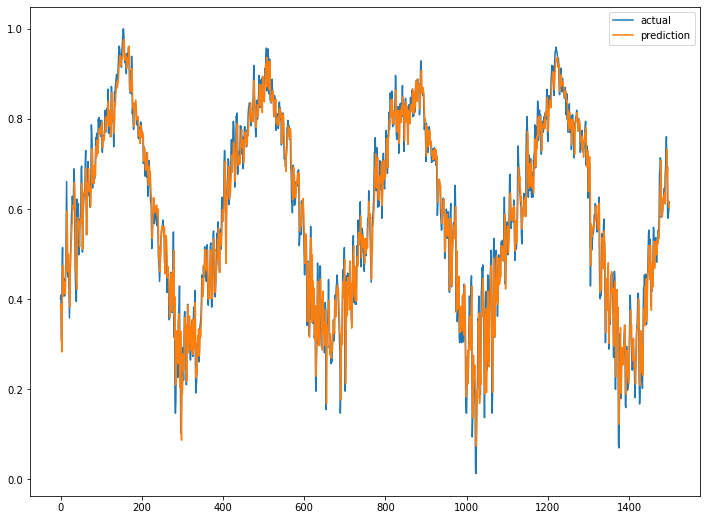

In [289]:
TEST_SIZE = 1520
WINDOW_SIZE = 365

train = df_lstm_std[:-TEST_SIZE]
test = df_lstm_std[-TEST_SIZE:]

def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


from sklearn.model_selection import train_test_split
import numpy as np


feature_cols = ['temp_max', 'temp_min', 'rainfall', 'humidity']
label_cols = ['temperature']
train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

X_train, X_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size = 0.2
)

X_train.shape, X_valid.shape
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(X_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [293]:
df_lstm_year = df_weather[df_weather['조사지역'] == '서울'].groupby(['연']).mean()

,temperature,temp_max,temp_min,rainfall,humidity,월,일
연,,,,,,,
1988,12.121311,16.877322,8.003005,2.078689,61.300546,6.513661,15.756831
1989,13.011233,17.555342,9.059452,3.937260,66.208219,6.526027,15.720548
1990,12.838904,17.142740,9.042466,6.453425,71.246575,6.526027,15.720548
1991,12.397534,17.033973,8.252329,3.173151,65.676712,6.526027,15.720548
1992,12.501093,16.967486,8.544536,3.975137,67.106557,6.513661,15.756831
1993,12.084658,16.729589,8.143836,3.541644,67.517808,6.526027,15.720548
1994,13.612329,18.373699,9.583562,2.892603,64.950685,6.526027,15.720548
1995,12.266849,16.700000,8.309041,4.379726,63.545205,6.526027,15.720548
1996,12.257923,16.870219,8.362295,3.433333,61.562842,6.513661,15.756831


In [ ]:
df_lstm = df_lstm[['temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity', '연', '월', '일']]
df_lstm = df_lstm.reset_index(drop=True)
lstm_std = scaler.fit_transform(df_lstm[df_lstm.columns[:-3]])
df_lstm_std = pd.DataFrame(lstm_std, columns = df_lstm.columns[:-3])

TEST_SIZE = 8
WINDOW_SIZE = 4

train = df_lstm_std[:-TEST_SIZE]
test = df_lstm_std[-TEST_SIZE:]

def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


from sklearn.model_selection import train_test_split
import numpy as np


feature_cols = ['temp_max', 'temp_min', 'rainfall', 'humidity']
label_cols = ['temperature']
train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

X_train, X_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size = 0.2
)

X_train.shape, X_valid.shape
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(X_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [313]:
# OLS로 예측

df_target = df_june_mean['temperature']
X_train2 = pd.DataFrame(df_june_mean[['연']], columns = ['연'])
y_train2 = df_target.values
import statsmodels.api as sm

X_train = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()
df_june_mean
model.predict(2040)

array([23.00562082])

In [331]:
df_weather2 = df_weather.copy()
df_weather2.columns = ['관측일자', '평균기온', '최고기온', '최저기온', '강수량', '습도', '조사지역', '연' ,'월', '일']
df_weather2.head()

,관측일자,평균기온,최고기온,최저기온,강수량,습도,조사지역,연,월,일
0,1988-01-01,-2.4,-0.8,-4.4,0.5,64.0,서울,1988,1,1
1,1988-01-01,-2.6,0.5,-6.2,1.9,73.0,관악산,1988,1,1
2,1988-01-01,-4.1,-0.7,-8.6,0.0,66.0,춘천,1988,1,1
3,1988-01-01,-3.1,-1.0,-8.6,0.4,79.0,철원,1988,1,1
4,1988-01-01,3.7,6.5,0.1,0.0,57.0,속초,1988,1,1


# 함수 구현 완료!

In [333]:
def weather_predict(region, month , pred_year, value):

    df_tmp_region = df_weather[df_weather['조사지역'] == region]
    df_weather_region = df_tmp_region.groupby(['조사지역', '관측일자']).mean()


    df_group_mean = df_weather_region.groupby(['연', '월']).mean()
    df_group_mean = df_group_mean.reset_index(drop=False)
    df_month_mean = df_group_mean[df_group_mean['월'] == month]

    for i in df_month_mean.index:
        df_tmp = df_weather_region.loc[(df_weather_region['연'] == df_month_mean.loc[i, '연']) & (df_weather_region['월'] == df_month_mean.loc[i, '월'])]
        temp_max = df_tmp['temp_max'].max()
        temp_min = df_tmp['temp_min'].max()
        df_month_mean.loc[i, 'temp_max'] = temp_max
        df_month_mean.loc[i, 'temp_min'] = temp_min


    df_target = df_month_mean[value]
    X_train2 = pd.DataFrame(df_month_mean[['연']], columns = ['연'])
    y_train2 = df_target.values
    import statsmodels.api as sm

    X_train = sm.add_constant(X_train2)
    model = sm.OLS(y_train2, X_train2).fit()
    model.summary()
    pred_value = model.predict(pred_year)
    return print(f'{region}의 {pred_year}년 {month}월 {value}예측값은 {pred_value}입니다.')

In [316]:
df_weather['조사지역'].unique()

array(['서울', '관악산', '춘천', '철원', '속초', '원주', '대관령', '태백', '삼척', '인제', '홍천',
       '대전', '금산', '부여', '천안', '보령', '서산', '청주', '추풍령', '보은', '제천', '인천',
       '강화', '수원', '이천', '양평', '광주', '장흥', '목포', '해남', '순천', '고흥', '완도',
       '여수', '전주', '임실', '군산', '부안', '정읍', '남원', '장수', '부산', '밀양', '창원',
       '통영', '거제', '진주', '산청', '남해', '거창', '합천', '울산', '제주', '고산', '서귀포',
       '성산포', '대구', '구미', '문경', '영주', '봉화', '안동', '영덕', '울진', '의성', '영천',
       '포항', '울릉도', '동해', '무안', '영월', '흑산도', '동두천', '문산', '진도', '상주',
       '고창'], dtype=object)

In [338]:
df_weather.columns

Index(['관측일자', 'temperature', 'temp_max', 'temp_min', 'rainfall', 'humidity',
       '조사지역', '연', '월', '일'],
      dtype='object')

In [ ]:
# weather_predict (지역, 월, 예측연도, 예측값) 입력!

In [337]:
weather_predict( '속초', 12, 2080, 'temp_min')

속초의 2080년 12월 temp_min예측값은 [5.82132356]입니다.
